## Libraries

In [1]:
"""
Add path for code repository
"""
import sys
sys.path.insert(0, "/Users/danieljacobsen/Dropbox/Cand.merc.mat/Speciale/Python/Speciale-Kode/Speciale")

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import time
import math

"""
Load own functions/packages
"""

# set plotting style
from codelib.visualization.layout import DefaultStyle
DefaultStyle();

## Data handling

### Futures data

In [2]:
df1 =pd.read_excel(r'/Users/danieljacobsen/Dropbox/Cand.merc.mat/Speciale/Python/Speciale-Kode/Data.xlsx', index_col=0, sheet_name=None, header=0)

In [3]:
#concatenates all sheet:
temp = pd.DataFrame()
all_data = pd.DataFrame()
for i in df1.keys():
    temp=df1[i][1:]
    temp.index = pd.to_datetime(temp.index)
    all_data = pd.merge(temp,all_data,left_index=True, right_index=True, how='outer')

#Filter to only include settlement prices, vol, etc:
fut_prices = all_data.filter(like="- SETT. PRICE")
fut_vol = all_data.filter(like="- VOLUME TRADED")
fut_oi = all_data.filter(like="- OPEN INTEREST")

In [4]:
#["2011-10-25":]
fut_oi["LIFFE-LONG GILT TRc2 - OPEN INTEREST"]["2011-10-20":]

nan
2011-10-20       2
2011-10-21       2
2011-10-24       2
2011-10-25       2
2011-10-26    7845
              ... 
2023-02-13       9
2023-02-14      19
2023-02-15      21
2023-02-16      48
2023-02-17     NaN
Name: LIFFE-LONG GILT TRc2 - OPEN INTEREST, Length: 2957, dtype: object

In [5]:
# TRC1:
trc1_prices = fut_prices.filter(regex='|'.join(["TRc1", "CONTINUOUS", "CONT.","CONT"]))
trc1_vol = fut_vol.filter(regex='|'.join(["TRc1", "CONTINUOUS", "CONT.","CONT"]))
trc1_oi = fut_oi.filter(regex='|'.join(["TRc1", "CONTINUOUS", "CONT.","CONT"]))


# TRC2 (continuous will be dublicates):
trc2_prices = fut_prices.filter(regex='|'.join(["TRc2","2ND","CONT "]))
trc2_vol = fut_vol.filter(regex='|'.join(["TRc2","2ND","CONT "]))
trc2_oi = fut_oi.filter(regex='|'.join(["TRc2","2ND","CONT "]))

In [6]:
## DUPLICATES:
trc1_prices.columns.intersection(trc2_prices.columns)

Index(['SFE-AU 3 YR T-BOND DAY CONT - SETT. PRICE', 'SFE-AU 10 YR T-BOND DAY CONT - SETT. PRICE'], dtype='object')

### Futures Bloomberg dates

In [7]:
### Bloomberg last trade data
df_cal =pd.read_excel(r'/Users/danieljacobsen/Dropbox/Cand.merc.mat/Speciale/Python/Speciale-Kode/fut_cal.xlsx', index_col=0, sheet_name=None, header=0, usecols=[1,2])

In [8]:
#concatenates all sheet:
temp = pd.DataFrame()
cal_data = pd.DataFrame()
for i in df_cal.keys():
    temp=df_cal[i]
    temp.rename(columns={"Last Trade": i}, inplace=True)
    cal_data = pd.merge(temp,cal_data,left_index=True, right_index=True, how='outer')

#Filtereing data to only include data afrer 1990
last_trade = cal_data["1990-01-01":]

In [9]:
#Renaming columns
last_trade = last_trade.rename(columns={'CM_COP':'COPPER','CM_AL' : 'ALUMINIUM','CM_Nick' : 'NICKEL','CM_Zinc' : 'ZINC','CM_BrentCrude' : 'BRENT CRUDE OIL',
       'CM_GasOil' : 'GAS OIL','CM_Cotton': 'COTTON','CM_Coffee' : 'COFFEE','CM_Cocoa' : 'COCOA','CM_Sugar' : 'SUGAR','CM_LiveCattle' : 'LIVE CATTLE',
       'CM_LeanHogs' : 'LEAN HOGS','CM_Corn' : 'CORN',
       'CM_SoyBeans' : 'SOYBEANS','CM_SoyMeal' : 'SOYBEAN MEAL','CM_SoyOil' : 'SOYBEAN OIL','CM_Wheat' : 'WHEAT','CM_WTICrude' : 'LIGHT CRUDE OIL',
       'CM_RBOBGasoline' : 'GASOLINE','CM_HeatingOil' : 'HEATING OIL','CM_NatGas' : 'NATURAL GAS','CM_Gold' : 'GOLD 100 OZ','CM_Silv': 'SILVER 5000 OZ',
       'CM_Plat' : 'PLATINUM','BD_Bobl' : 'BOBL','BD_Schatz' : 'SCHATZ','BD_Bund' : 'BUND','BD_Buxl' : 'BUXL',
       'BD_AU3Y': 'AU 3 YR T-BOND','BD_AU10Y': 'AU 10 YR T-BOND',
       'BD_CAD10Y': '10Y CANADIAN GOVT BOND','BD_JPY10Y' : 'JP 10 YEAR T-BOND','BD_LG' : 'UK LONG GILT','BD_US2' : '2 YEAR US T-NOTE',
       'BD_US5' :'5 YEAR US T-NOTE','BD_US10' :'10 YEAR US T-NOTE','BD_US30' :'30 YEAR US T-BOND','EQ_DAX' : 'DAX INDEX','EQ_TOPIX' : 'TOPIX INDEX',
       'EQ_AEX' : 'AEX INDEX','EQ_IBEX35' : 'IBEX 35','EQ_FT100':'FTSE 100','EQ_SP500' : 'S&P 500','EQ_CAC40' : 'CAC 40','EQ_ASX' : 'SPI 200',
       'EQ_FTSEMIB' : 'FTSE MIB','EQ_OMXS30' : 'OMXS30'})

In [10]:
#To datetime:
for i in last_trade.columns:
        last_trade[i]=pd.to_datetime(last_trade[i])

### FX data

In [11]:
#df2 =pd.read_excel(r'/Users/danieljacobsen/Dropbox/Cand.merc.mat/Speciale/Python/Speciale-Kode/Speciale_Data.xlsx', index_col=0, sheet_name=None, header=0)

df2 =pd.read_excel(r'/Users/danieljacobsen/Dropbox/Cand.merc.mat/Speciale/Python/Speciale-Kode/SR_CR_CCY.xlsx', index_col=0, sheet_name="CR_SR", header=0)

In [12]:
fx_data = df2.filter(regex='|'.join(["CR"]))
fx_data.index = pd.to_datetime(fx_data.index)
fx_data = fx_data.rename(columns=lambda x: x[:3])
fx_data = fx_data["1990-01-01":]

#FX_spot = df2["SPOT"][1:]
#FX_spot.index= pd.to_datetime(FX_spot.index)

#FX_1m_fwd = df2["FWD"][1:]
#FX_1m_fwd.index= pd.to_datetime(FX_1m_fwd.index)

#Rename to only include first three letters:
#FX_spot = FX_spot.rename(columns={col: col[:3] for col in FX_spot.columns})
#FX_1m_fwd = FX_1m_fwd.rename(columns={col: col[:3] for col in FX_1m_fwd.columns})

#Calculating fwd rates (given as bps spread to spot)
#FX_1m_fwd = FX_1m_fwd/10000 + FX_spot

## Returns_2 - after we got expiry dates (ignore "Returns" further down)

In [13]:
# Renaming columns
col_names = ['COPPER', 'ALUMINIUM','NICKEL', 'ZINC','BRENT CRUDE OIL','GAS OIL', 'COTTON','COFFEE', 'COCOA','SUGAR','LIVE CATTLE','LEAN HOGS','CORN',
       'SOYBEANS','SOYBEAN MEAL','SOYBEAN OIL','WHEAT','LIGHT CRUDE OIL','GASOLINE','HEATING OIL','NATURAL GAS','GOLD 100 OZ','SILVER 5000 OZ','PLATINUM','BOBL','SCHATZ','BUND','BUXL',
       'AU 3 YR T-BOND','AU 10 YR T-BOND',
       '10Y CANADIAN GOVT BOND','JP 10 YEAR T-BOND','UK LONG GILT','2 YEAR US T-NOTE','5 YEAR US T-NOTE','10 YEAR US T-NOTE','30 YEAR US T-BOND','DAX INDEX','TOPIX INDEX',
       'AEX INDEX','IBEX 35','FTSE 100','S&P 500','CAC 40','SPI 200','FTSE MIB','OMXS30']

trc1_prices.columns=col_names
trc2_prices.columns=col_names
trc1_vol.columns=col_names
trc2_vol.columns=col_names
trc1_oi.columns=col_names
trc2_oi.columns=col_names

#Limiting data to 1990-01-01 and forward:
trc1_prices=trc1_prices["1990-01-01":]
trc2_prices=trc2_prices["1990-01-01":]
trc1_vol=trc1_vol["1990-01-01":]
trc2_vol=trc2_vol["1990-01-01":]
trc1_oi=trc1_oi["1990-01-01":]
trc2_oi=trc2_oi["1990-01-01":]

In [14]:
#Calculating returns for futures
trc1_returns = trc1_prices.pct_change(1).shift(-1)
trc2_returns = trc2_prices.pct_change(1).shift(-1)

In [15]:
prices_filtered2 = trc1_prices.copy()*0

#Dataframe with 1 if trc1 OI is largest and 0 if not
largest_oi_trc1 = (trc1_oi > trc2_oi).astype(int)
largest_oi_trc2 = (trc1_oi < trc2_oi).astype(int)

#Dataframe with 1 if trc1 OI is NaN and trc1 vol > trc1 vol
largest_vol_trc1 = ((trc1_vol > trc2_vol) & ((trc1_oi.isna())|(trc2_oi.isna()))).astype(int)
largest_vol_trc2 = ((trc1_vol < trc2_vol) & ((trc1_oi.isna())|(trc2_oi.isna()))).astype(int)

# 1 if vol and OI i NaN, 0 if not
temp = largest_oi_trc1+largest_oi_trc2+largest_vol_trc1+largest_vol_trc2
nan_data = temp.replace(0,np.nan).isnull().astype(int)

#creates data frames with values:
largest_oi_trc1 = largest_oi_trc1 * trc1_returns
largest_oi_trc2 = largest_oi_trc2 * trc2_returns
largest_vol_trc1 = largest_vol_trc1 * trc1_returns
largest_vol_trc2 = largest_vol_trc2 * trc2_returns

# For nan_data, we should trade trc1 if we are more than 2 trading days away from last trade.
temp2 = nan_data.copy()*0

#Finding the dates that are last trade
for i in nan_data.columns :
    temp2[i].loc[temp2.index.isin(last_trade[i])] = 1

#the day before and two days before last trade
temp3 = temp2.shift(-1)+temp2.shift(-2)
#Ensures no duplicates --> for dates with OI or Vol, we use these
temp3 = temp2*nan_data

#NaN OI and VOL price data can now be found:
nan_data = trc1_returns*nan_data-trc1_returns*temp3+trc2_returns*temp3

prices_filtered2 = largest_oi_trc1+ largest_oi_trc2 + largest_vol_trc1 + largest_vol_trc2 + nan_data

#Correction: as the TRC2 index shifts to TRC1 on the last trade, this return has to be used as the return places on those dates.
#This will always apply, as we will never hold the future until expiry, why these returns will always apply. (we will hold the TRC2 on these dates)
temp3 = temp2.shift(1)
return_last_trade = trc2_prices*temp2 + trc1_prices*temp3
return_last_trade = return_last_trade.pct_change(1).shift(-1)*temp2

prices_filtered2 = temp2.replace({1:0,0:1,np.nan:1})*prices_filtered2 + temp2.replace({np.nan:0})*return_last_trade.replace({np.nan:0})



In [16]:
#Calculating returns for futures - UPDATED NOW DONE IN PREVIOUS CODE BUT MAKES THE REST EASIER
returns_daily = prices_filtered2.copy()

#FX returns:
FX_returns_daily = fx_data.pct_change(1)

# Merging with FX also (but only trading days -> merging based on index for future returns)
returns_daily = pd.merge(returns_daily, FX_returns_daily,left_index=True, right_index=True, how='left')

#Restricting data to 31-01-2023
returns_daily = returns_daily[:"2023-01-31"]

In [17]:
#Proxy for trading days per year:
len(returns_daily)/(33+1/12)

260.9168765743073

In [18]:
returns_daily["BUXL"].sort_values(ascending=False)

nan
2003-03-14    0.123828
2016-06-23    0.046565
2022-09-30    0.045554
2022-10-24    0.041179
2020-03-19    0.035225
                ...   
1998-09-25         NaN
1998-09-28         NaN
1998-09-29         NaN
1998-09-30         NaN
1998-10-01         NaN
Name: BUXL, Length: 8632, dtype: float64

In [19]:
#Unrealisticly large outliers: (i.e. sugar -72% which is due to error in last trade data)
np.max(returns_daily,axis=0)

COPPER                    0.126590
ALUMINIUM                 0.062109
NICKEL                    0.634604
ZINC                      0.137566
BRENT CRUDE OIL           0.210186
GAS OIL                   0.148744
COTTON                    0.075282
COFFEE                    0.261514
COCOA                     0.129191
SUGAR                     0.115928
LIVE CATTLE               0.061410
LEAN HOGS                 0.283610
CORN                      0.090480
SOYBEANS                  0.069606
SOYBEAN MEAL              0.252080
SOYBEAN OIL               0.076851
WHEAT                     0.091926
LIGHT CRUDE OIL           0.246677
GASOLINE                  0.212809
HEATING OIL               0.231379
NATURAL GAS               0.206394
GOLD 100 OZ               0.092941
SILVER 5000 OZ            0.129707
PLATINUM                  0.115207
BOBL                      0.021488
SCHATZ                    0.005790
BUND                      0.033241
BUXL                      0.123828
AU 3 YR T-BOND      

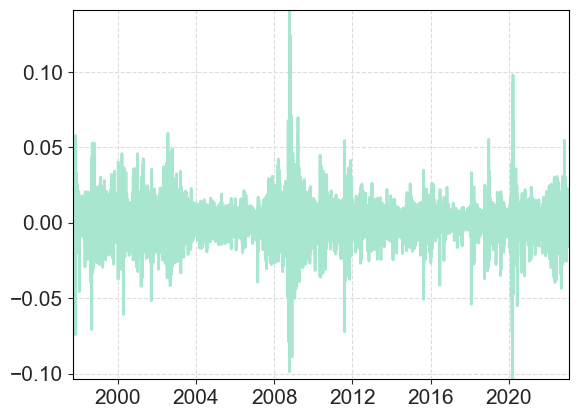

In [20]:
plt.plot(returns_daily["S&P 500"])

<AxesSubplot: >

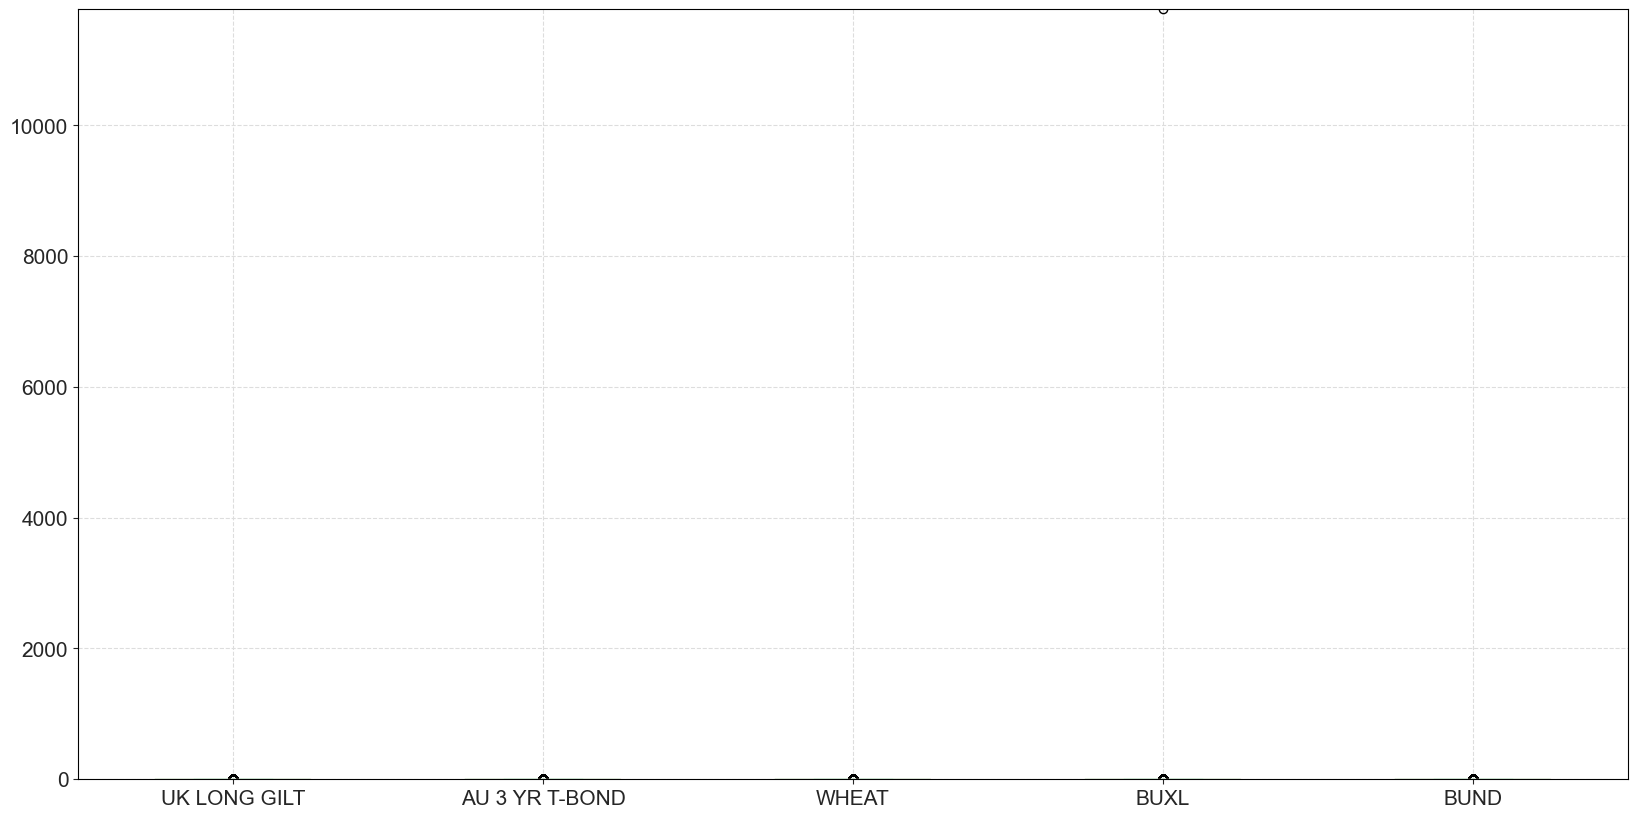

In [20]:
import random
ax = returns_daily[random.choices(col_names,k=5)]

ax.plot(figsize=(20,10),kind="box")

In [21]:
sns.pairplot(returns_daily[random.choices(returns_daily.columns,k=10)])

In [21]:
#Annualized returns:
ann_returns = np.mean(returns_daily,axis=0)*261

#Annualized volatilituies
ann_vol = np.std(returns_daily,axis=0)*np.sqrt(261)

ann_vol*100

COPPER                    25.050594
ALUMINIUM                 20.958520
NICKEL                    36.916068
ZINC                      27.965613
BRENT CRUDE OIL           35.383519
GAS OIL                   33.343004
COTTON                    25.791939
COFFEE                    36.108368
COCOA                     28.893781
SUGAR                     30.523380
LIVE CATTLE               15.527411
LEAN HOGS                 30.089705
CORN                      24.419796
SOYBEANS                  21.947899
SOYBEAN MEAL              31.497917
SOYBEAN OIL               25.524885
WHEAT                     28.113693
LIGHT CRUDE OIL           39.338853
GASOLINE                  40.034462
HEATING OIL               36.589688
NATURAL GAS               49.919773
GOLD 100 OZ               16.083113
SILVER 5000 OZ            28.939127
PLATINUM                  21.578100
BOBL                       3.412582
SCHATZ                     1.257158
BUND                       5.590725
BUXL                      13

# Correlation matrix and covariance matrix

In [22]:
# Covariance matrix:
cov1 = returns_daily.cov(numeric_only=False)

# Correlation matrix:
corr1 = returns_daily.corr(numeric_only=False)

# Standard deviation matrix:
std1 = returns_daily.std(numeric_only=False)


#var1 % corr1 % var1

## Tangent portfolio

In [23]:
ER_1 = returns_daily.mean(axis=0)

r_f = 0

In [24]:
def tangency_portfolio(cov_mat: np.ndarray, mu: np.ndarray, rf: float) -> np.ndarray:
    
    """
    Calculates the maximum sharpe ratio portfolio weights.

    Parameters
    ----------
    cov_mat:
        The covariance matrix.
    mu: 
        Expected return vector. 
    rf: 
        The risk free rate. 

    Returns
    -------
    np.ndarray
        maximum sharpe ratio portfolio weights.

    """
    
    num_assets = len(cov_mat)
    vec_ones = np.ones(num_assets)

    excess_mu = mu - vec_ones * rf

    cov_mat_inv = np.linalg.inv(cov_mat)
    
    w_max_sr = cov_mat_inv @ excess_mu / (vec_ones @ cov_mat_inv @ excess_mu)
    
    return w_max_sr

In [25]:
X_tan = tangency_portfolio(cov1 , ER_1, r_f)

X_tan = pd.DataFrame(X_tan).set_axis(returns_daily.columns)

X_tan

,0
COPPER,0.019637
ALUMINIUM,-0.018653
NICKEL,0.008067
ZINC,0.004852
BRENT CRUDE OIL,0.041411
GAS OIL,0.010610
COTTON,-0.005607
COFFEE,-0.003429
COCOA,0.000619
SUGAR,0.006551


## PCA

In [ ]:
#preparing dataframes

N = 2610
returns_daily_10Y = [[[]]]

for i in range(len(returns_daily)-N+1):
    returns_daily_10Y.append(returns_daily[i:i+N])
    returns_daily_10Y[i+1]=returns_daily_10Y[i+1].dropna(axis=1)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
#scaling = 
returns_10Y_scaled = scale(returns_daily_10Y[-1])
# USING SKLEARN
pca = PCA(n_components=len(returns_daily.columns)) 
pca.fit_transform(returns_10Y_scaled)

# get the Principal components
pcs =pca.components_

# first component
pc1 = pcs[0,:]
# normalized to 1 
pc_w = np.asmatrix(pc1/sum(pc1)).T

In [ ]:
#return
np.array((1+returns_daily_10Y[-1]).cumprod(axis=0))[-1:] @ np.array(pc_w)

array([[1.99069334]])

In [ ]:
#return for all PCAs based on 9Y data historically --> the 10th year will be used for realised returns

pc_j = [[[]]]

for i in range(len(returns_daily_10Y)-1): # number of arrays
    #scaling to mean 0 and sd=1
    returns_10Y_scaled = scale(returns_daily_10Y[i+1][:-261])

    # USING SKLEARN
    pca = PCA(n_components=len(returns_daily_10Y[i+1][:-261].columns)) 
    pca.fit_transform(returns_10Y_scaled)

    # get the Principal components
    pcs =pca.components_

    # j'th component
    pc_j.append(pcs)
#We now have all principal components


In [ ]:
pc_w = [[[]]]
pc_ER = pd.DataFrame(0,index=returns_daily[returns_daily_10Y[1].index[-1]:].index, columns = range(58))
pc_Evol = pd.DataFrame(0,index=returns_daily[returns_daily_10Y[1].index[-1]:].index, columns = range(58))
pc_RR = pd.DataFrame(0,index=returns_daily[returns_daily_10Y[1].index[-1]:].index, columns = range(58))
pc_Rvol = pd.DataFrame(0,index=returns_daily[returns_daily_10Y[1].index[-1]:].index, columns = range(58))
for i in range(len(returns_daily_10Y)-1): # number of array
    #calculating portfolio weights
    pc_w.append(pd.DataFrame(np.asmatrix(pc_j[i+1]/sum(pc_j[i+1])).T))

    #Calculating ex Ante expected return (hisrical returns)
    temp = pd.DataFrame(np.array(returns_daily_10Y[i+1][:-261])) @ np.array(pc_w[i+1].T)

    #expected returns:
    pc_ER.iloc[i,0:len(pc_w[i+1])] = temp.mean(axis=0)

    #expected vol:
    pc_Evol.iloc[i,0:len(pc_w[i+1])] = temp.std(axis=0)

    #Calculating realised return (hisrical returns)
    temp2 = pd.DataFrame(np.array(returns_daily_10Y[i+1][-261:])) @ np.array(pc_w[i+1].T)

    #realised returns:
    pc_RR.iloc[i,0:len(pc_w[i+1])] = temp2.mean(axis=0)

    #realised vol:
    pc_Rvol.iloc[i,0:len(pc_w[i+1])] = temp2.std(axis=0)

    


In [ ]:
#Annualizing returns and vol:
pc_ER_an = pc_ER.replace(0,np.nan) * 261
pc_Evol_an = pc_Evol.replace(0,np.nan) * np.sqrt(261)

#Sharpe
ESR_pc = pc_ER_an.mean(axis=0)/pc_Evol_an.mean(axis=0)

#Average annualized sharpe:
ESR_pc

0     0.096264
1     0.101982
2     0.053779
3    -0.009295
4    -0.138346
5     0.054702
6    -0.038531
7     0.105720
8    -0.357195
9    -0.305899
10   -0.035462
11   -0.076983
12    0.079850
13   -0.005928
14    0.045318
15   -0.008264
16   -0.037407
17    0.003604
18    0.030509
19   -0.029897
20    0.155748
21    0.021857
22    0.046700
23    0.090869
24    0.017714
25    0.024857
26    0.065878
27    0.003824
28    0.011591
29   -0.117760
30    0.094510
31   -0.004274
32    0.046975
33    0.077808
34    0.030246
35    0.001772
36    0.022442
37   -0.023376
38   -0.005124
39    0.068347
40   -0.039518
41    0.083065
42    0.079607
43    0.013792
44    0.067376
45    0.048131
46   -0.026263
47    0.105210
48   -0.075077
49    0.129074
50    0.111912
51   -0.086387
52   -0.086136
53    0.079331
54   -0.077875
55    0.058028
56   -0.009236
57    0.171301
dtype: float64

In [ ]:
#Annualizing returns and vol:
pc_RR_an = pc_RR.replace(0,np.nan) * 261
pc_Rvol_an = pc_Rvol.replace(0,np.nan) * np.sqrt(261)

#Sharpe
RSR_pc = pc_RR_an.mean(axis=0)/pc_Rvol_an.mean(axis=0)

#Average annualized sharpe:
RSR_pc

0     0.010336
1    -0.451651
2    -0.018969
3    -0.279599
4     0.361491
5     0.163256
6     0.175914
7     0.044488
8    -0.843548
9     0.012690
10   -0.020870
11    0.039985
12    0.603296
13   -0.196133
14    0.279347
15    0.021149
16   -0.035990
17    0.260125
18   -0.013901
19    0.098872
20    0.161552
21   -0.087437
22   -0.089496
23   -0.015671
24   -0.069166
25    0.336467
26    0.158072
27   -0.044950
28   -0.300062
29    0.163184
30   -0.036604
31   -0.010920
32    0.260013
33   -0.149075
34    0.374071
35    0.136651
36   -0.123515
37    0.694119
38   -0.118326
39    0.039919
40   -0.170335
41   -0.256222
42   -0.287767
43    0.217252
44    0.112130
45    0.020277
46   -0.107183
47    0.264684
48   -0.465091
49   -0.112508
50   -0.130415
51    0.278480
52   -0.054765
53    1.469729
54   -0.099747
55    0.054857
56    0.119386
57    0.016953
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

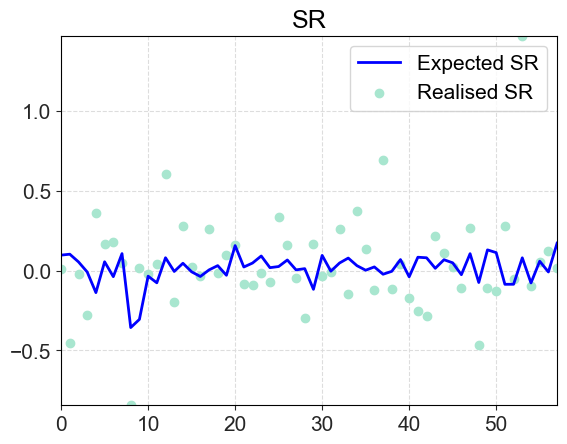

In [ ]:
plt.plot(ESR_pc.index,ESR_pc.values, color="blue")
plt.scatter(RSR_pc.index,RSR_pc.values)
plt.title("SR")
plt.legend(["Expected SR", "Realised SR"])
plt.show

## PCA2

In [ ]:
#Daily return index
index_daily_returns = (1+returns_daily).cumprod(axis=0)

#Monthly return index:
index_monthly = index_daily_returns.assign(m=index_daily_returns.index.to_period("m")).drop_duplicates("m").drop("m",axis=1)

#Monthly returns:
returns_monthly = index_monthly.pct_change(1)

#Annual returns:
returns_annual = index_monthly.pct_change(12)

#LTM monthly volatily
vol_monthly_12m = returns_monthly.rolling(12, min_periods=12).std()
#Expected monthly return (s_t)
s_t = 0.1 * vol_monthly_12m * np.sign(returns_annual)

In [ ]:
#preparing dataframes

N = 2610
returns_daily_10Y = [[[]]]

for i,date in enumerate(index_monthly.index[120:]):
    returns_daily_10Y.append(returns_daily[index_monthly.index[i]:date])
    returns_daily_10Y[i+1]=returns_daily_10Y[i+1].dropna(axis=1)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
#PCA components

pc_j = [[[]]]
m_exp_ret = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))
m_real_ret = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))

for i in range(len(returns_daily_10Y)-2): # number of arrays
    #scaling to mean 0 and sd=1
    returns_10Y_scaled = scale(returns_daily_10Y[i+1])

    # USING SKLEARN
    pca = PCA(n_components=len(returns_daily_10Y[i+1].columns)) 
    pca.fit_transform(returns_10Y_scaled)

    # get the Principal components
    pcs =pca.components_

    # j'th component
    pc_j.append(pcs)

    #We now have all principal components
    # PCA returns using formula P_T sigma^-1 s and P_T sigma^-1 r

    sigma_i = np.diag(returns_daily_10Y[i+1].std())

    s_temp = s_t[121+i:122+i][s_t.columns[s_t.columns.isin(returns_daily_10Y[i+1].columns)]]

    r_temp = returns_monthly[121+i:122+i][s_t.columns[s_t.columns.isin(returns_daily_10Y[i+1].columns)]]

    m_exp_ret.iloc[i:i+1,0:len(s_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(s_temp)[0]

    m_real_ret.iloc[i:i+1,0:len(r_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(r_temp)[0]
    

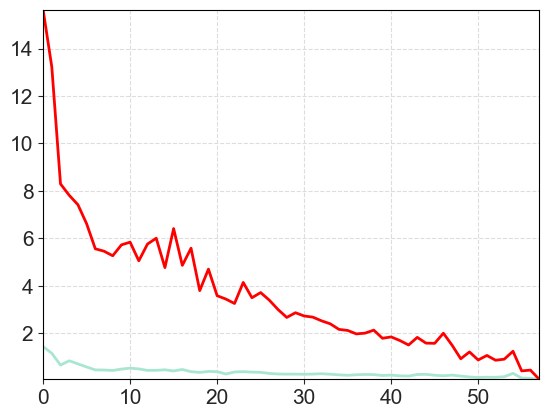

In [ ]:
plt.plot(m_exp_ret.replace(0,np.nan).std())
plt.plot(m_real_ret.replace(0,np.nan).std(), color = "red")

plt.show()

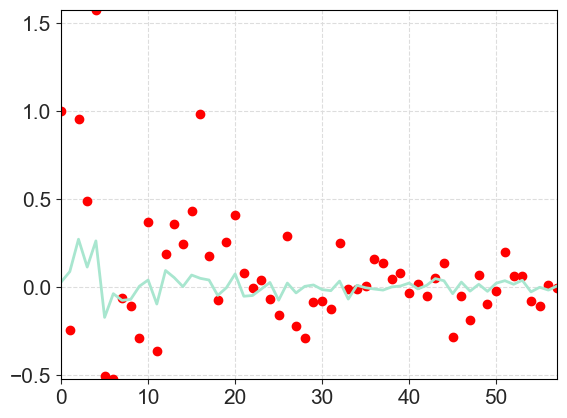

In [ ]:
plt.plot(m_exp_ret.replace(0,np.nan).mean(axis=0))
plt.scatter(m_real_ret.replace(0,np.nan).mean(axis=0).index,m_real_ret.replace(0,np.nan).mean(axis=0).values, color = "red")

plt.show()

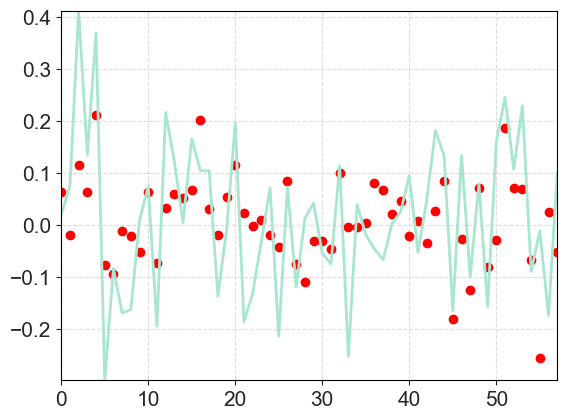

In [ ]:
plt.plot(m_exp_ret.replace(0,np.nan).mean(axis=0)/m_exp_ret.replace(0,np.nan).std())
plt.scatter(m_real_ret.replace(0,np.nan).mean(axis=0).index,m_real_ret.replace(0,np.nan).mean(axis=0).values/m_real_ret.replace(0,np.nan).std().values, color = "red")

plt.show()

## MUNUAL PCA

In [ ]:
test = returns_daily[-2610:-22]


cov_test = np.cov(scale(test).T)

corr_test = np.corrcoef(scale(test).T)

In [ ]:
eig_info = np.linalg.eig(cov_test)

print("eigenvalues: ")
#pd.DataFrame(eig_info[0])
#print("\n")
#print("eigenvector:")
pd.DataFrame(eig_info[1][:, 0])
#print("\n")
#print("eigenvector:")
#print(eig_info[1][:, 1])

eigenvalues: 


,0
0,0.146267
1,0.101457
2,0.087168
3,0.112644
4,0.177825
5,0.170246
6,0.091258
7,0.055128
8,0.060216
9,0.067314


In [ ]:
E = eig_info[1][:, 1]

np.sqrt(E @ cov_test @ E)

2.801820476285237

In [ ]:
(scale(test) @ E).std()

2.8012791140009283

In [ ]:
for i in range(58):     
    E = pd.DataFrame(eig_info[1][:, i])
    print((np.array(test) @ E).std())

0    0.039949
dtype: float64
0    0.019457
dtype: float64
0    0.017766
dtype: float64
0    0.036718
dtype: float64
0    0.028568
dtype: float64
0    0.007153
dtype: float64
0    0.021078
dtype: float64
0    0.012145
dtype: float64
0    0.014627
dtype: float64
0    0.014873
dtype: float64
0    0.018581
dtype: float64
0    0.017697
dtype: float64
0    0.026241
dtype: float64
0    0.013405
dtype: float64
0    0.015115
dtype: float64
0    0.015453
dtype: float64
0    0.013444
dtype: float64
0    0.013638
dtype: float64
0    0.014132
dtype: float64
0    0.013172
dtype: float64
0    0.009284
dtype: float64
0    0.013362
dtype: float64
0    0.01678
dtype: float64
0    0.012818
dtype: float64
0    0.008913
dtype: float64
0    0.006914
dtype: float64
0    0.006735
dtype: float64
0    0.009872
dtype: float64
0    0.009755
dtype: float64
0    0.006071
dtype: float64
0    0.010808
dtype: float64
0    0.000149
dtype: float64
0    0.000866
dtype: float64
0    0.000693
dtype: float64
0    0.009352
d

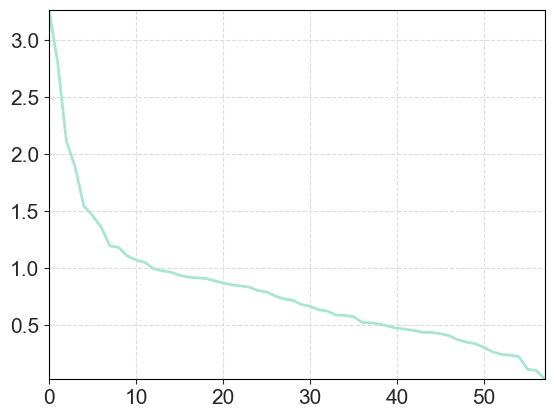

In [ ]:
plt.plot(np.sqrt(pd.DataFrame(eig_info[0]).sort_values(by=[0],ascending=False).reset_index()[0]))

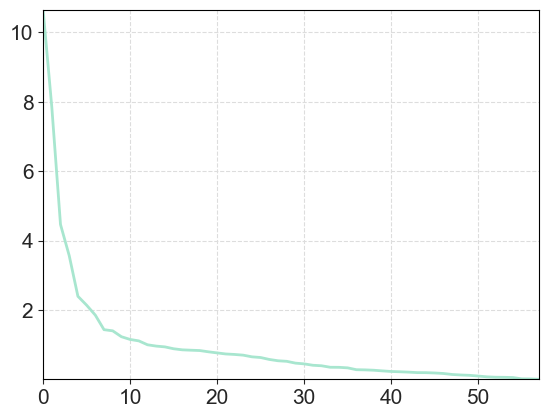

In [ ]:
plt.plot(pca.explained_variance_)

In [ ]:
pca = PCA(n_components=len(test.columns)) 
pca.fit_transform(scale(test))

# get the Principal components
pcs =pca.components_

In [ ]:
#Daily return index
index_daily_returns = (1+returns_daily).cumprod(axis=0)

#Monthly return index:
index_monthly = index_daily_returns.assign(m=index_daily_returns.index.to_period("m")).drop_duplicates("m").drop("m",axis=1)

#Monthly returns:
returns_monthly = index_monthly.pct_change(1)

#Annual returns:
returns_annual = index_monthly.pct_change(12)

#LTM monthly volatily
vol_monthly_12m = returns_monthly.rolling(12, min_periods=12).std()
#Expected monthly return (s_t)
s_t = 0.1 * vol_monthly_12m * np.sign(returns_annual)

In [ ]:
returns_monthly[1:120].dropna(axis=1)

,BRENT CRUDE OIL,GAS OIL,COTTON,COFFEE,COCOA,SUGAR,LIVE CATTLE,LEAN HOGS,CORN,SOYBEANS,...,EUR,GBP,DKK,CHF,SEK,JPY,CAD,NOK,TRY,AUD
nan,,,,,,,,,,,,,,,,,,,,,
1990-02-01,0.043004,-0.174279,-0.017869,-0.002234,0.035522,0.137481,0.012222,-0.017168,-0.004206,-0.026921,...,-0.016597,-0.049803,-0.019764,-0.052004,-0.016814,-0.004829,0.020692,-0.022132,0.000000,0.005512
1990-03-01,-0.018330,-0.002967,0.022564,0.227423,0.146178,-0.021650,-0.002877,0.079914,0.038544,0.019143,...,0.011952,0.016446,0.008925,0.009999,0.000940,0.034557,0.001253,0.012436,0.000000,0.012243
1990-04-02,-0.044491,0.005871,0.060467,-0.074889,0.102284,0.053905,0.018697,0.090088,0.054323,0.006333,...,-0.010272,0.001445,-0.017958,-0.007790,-0.012349,0.059678,-0.027343,-0.005825,0.000000,-0.006851
1990-05-01,-0.089915,0.002621,0.019072,-0.019348,0.056692,0.033875,0.006840,0.093290,0.072356,0.087156,...,-0.010710,-0.009716,-0.018427,-0.032107,-0.011517,-0.004357,-0.003084,-0.012562,0.000000,0.005733
1990-06-01,-0.082987,-0.083710,0.082243,0.006065,0.010195,-0.143492,0.010987,0.018005,-0.052768,-0.090526,...,0.008676,-0.027915,0.005682,-0.010424,-0.000174,-0.041490,0.003264,-0.004415,0.000000,-0.026324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-08-02,0.105245,0.082650,-0.013180,-0.044913,-0.063960,-0.014682,0.025535,0.125738,0.083935,0.092312,...,-0.038275,-0.025422,-0.038319,-0.041936,-0.035372,-0.043054,0.020616,-0.017344,-0.047336,0.021878
1999-09-01,0.077655,0.100266,-0.027991,-0.014447,-0.065508,0.122517,0.026164,0.049052,-0.037920,0.035339,...,0.001457,0.008044,0.000907,0.001453,0.002782,-0.049172,0.002703,0.004790,-0.031241,0.015393
1999-10-01,0.120613,0.064249,0.022485,-0.118221,0.053719,-0.014872,0.034346,0.039046,-0.079955,-0.024723,...,-0.002093,-0.028521,-0.002234,-0.002765,-0.006762,-0.022319,-0.017455,-0.016003,-0.018039,-0.025921


In [ ]:
#PCA components

pc_j = [[[]]]
m_exp_ret = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))
m_real_ret = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))

for i in range(len(returns_monthly[120:])-2): # number of arrays
    #scaling to mean 0 and sd=1
    returns_10Y_scaled = scale(returns_monthly[1+i:120+i].dropna(axis=1))

    # USING SKLEARN
    pca = PCA(n_components=len(returns_monthly[1+i:120+i].dropna(axis=1).columns)) 
    pca.fit_transform(returns_10Y_scaled)

    # get the Principal components
    pcs =pca.components_

    # j'th component
    pc_j.append(pcs)

    #We now have all principal components
    # PCA returns using formula P_T sigma^-1 s and P_T sigma^-1 r

    sigma_i = np.diag(returns_monthly[1+i:120+i].dropna(axis=1).std())

    s_temp = s_t[121+i:122+i][s_t.columns[s_t.columns.isin(returns_monthly[1+i:120+i].dropna(axis=1).columns)]]

    r_temp = returns_monthly[121+i:122+i][s_t.columns[s_t.columns.isin(returns_monthly[1+i:120+i].dropna(axis=1).columns)]]

    m_exp_ret.iloc[i:i+1,0:len(s_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(s_temp)[0]

    m_real_ret.iloc[i:i+1,0:len(r_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(r_temp)[0]
    

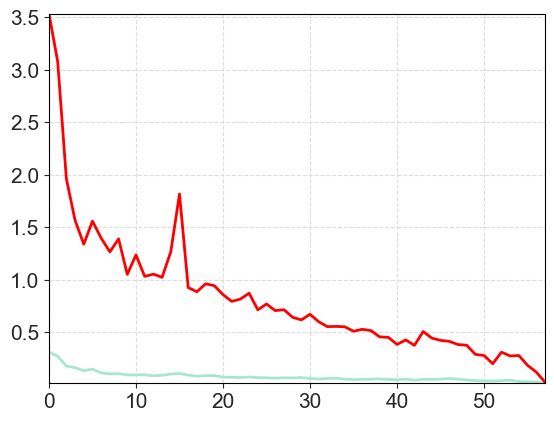

In [ ]:
plt.plot(m_exp_ret.replace(0,np.nan).std())
plt.plot(m_real_ret.replace(0,np.nan).std(), color = "red")

plt.show()

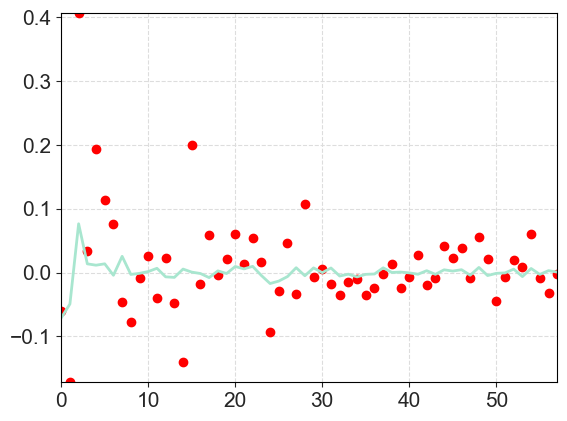

In [ ]:
plt.plot(m_exp_ret.replace(0,np.nan).mean(axis=0))
plt.scatter(m_real_ret.replace(0,np.nan).mean(axis=0).index,m_real_ret.replace(0,np.nan).mean(axis=0).values, color = "red")

plt.show()

In [ ]:
returns_10Y_scaled = scale(returns_daily[-200:-1])

# USING SKLEARN
pca = PCA(n_components=len(returns_daily[-200:-1].columns)) 
pca.fit_transform(returns_10Y_scaled)

# get the Principal components
pcs =pca.components_

In [ ]:
pcs[0:5] @ np.linalg.inv(np.diag(returns_daily[-2600:-1].std(axis=0)))@ returns_daily[-1:].values[0]

array([2.80361807, 4.8721874 , 1.88996922, 3.0333869 , 2.95229744])

In [ ]:
pcs[50:58] @ np.linalg.inv(np.diag(returns_daily[-2600:-1].std(axis=0)))@ returns_daily[-1:].values[0]

array([ 2.58578590e-01,  4.26639693e-01, -2.54934351e-01, -9.41458074e-03,
       -1.01331833e-01, -1.43421021e-03,  4.90533528e-03, -8.49826469e-17])

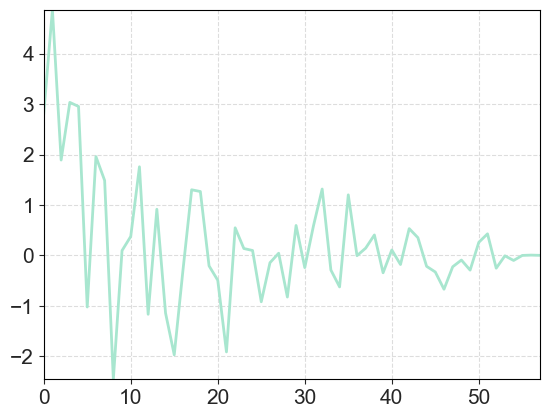

In [ ]:
plt.plot(pcs[0:58] @ np.linalg.inv(np.diag(returns_daily[-2600:-1].std(axis=0)))@ returns_daily[-1:].values[0])

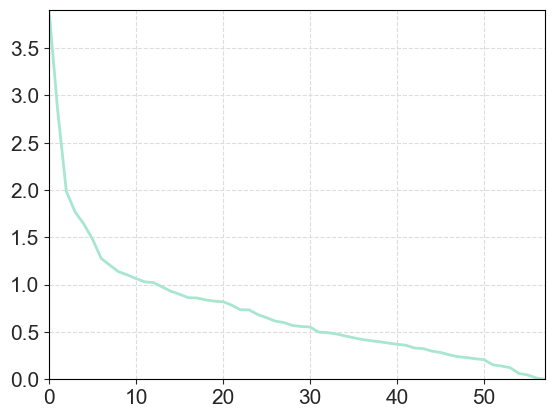

In [ ]:
plt.plot(np.sqrt(pca.explained_variance_))

# PCA NEW EXP VOL

In [27]:
#Daily return index
index_daily_returns = (1+returns_daily).cumprod(axis=0)

#Monthly return index:
index_monthly = index_daily_returns.assign(m=index_daily_returns.index.to_period("m")).drop_duplicates("m").drop("m",axis=1)

#Monthly returns:
returns_monthly = index_monthly.pct_change(1)

#Annual returns:
returns_annual = index_monthly.pct_change(12)

#Monthly realised returns --> r_t+1:
r_t1 = returns_monthly.shift(1)

In [28]:
#3 day rolling sum
returns_daily_3droll = returns_daily.rolling(3, min_periods=1).sum()

#exponentially expanding average vol
ewm_corr_mat = returns_daily_3droll.ewm(com=150, min_periods=300).corr()

In [29]:
#First trading day 01-01-2000
ewm_corr_mat = ewm_corr_mat["2000-01-01":]

In [30]:
# A slicing helper. Works similarly to slicing in Python (e.g. list slicing),
#                   but is inclusive of both the start and stop values.
idx = pd.IndexSlice

ewm_corr_mat_m = ewm_corr_mat.loc[idx[returns_monthly.index,:],]

/var/folders/wd/cd8y8dwx7fgb3sln6cpbzwpc0000gn/T/ipykernel_96439/258984340.py:5: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  ewm_corr_mat_m = ewm_corr_mat.loc[idx[returns_monthly.index,:],]


In [189]:
#sigma diagonal matrix
sigma = returns_daily.ewm(com=60, min_periods=300).std()["2000-01-01":]

sigma =np.sqrt(22) * sigma.assign(m=sigma.index.to_period("m")).drop_duplicates("m").drop("m",axis=1)

In [190]:
#Expected daily returns (s_t)
returns_annual = returns_annual["2000-01-01":]
s_t = 0.1 * sigma * np.sign(returns_annual)

In [204]:
m_exp_ret = pd.DataFrame(0,index=s_t.index, columns=range(58))
m_real_ret =  pd.DataFrame(0,index=s_t.index, columns=range(58))
m_exp_vol =  pd.DataFrame(0,index=s_t.index, columns=range(58))
m_exp_SR =  pd.DataFrame(0,index=s_t.index, columns=range(58))

test_D = list()
R_s = list()
R_r = list()

for [i, index1] in enumerate(s_t.index):
    
    eig_info = np.linalg.eig(np.array(ewm_corr_mat_m.loc[index1,].dropna(axis=0,how="all").dropna(axis=1,how="all")))

    P = pd.DataFrame(eig_info[1])


    D = pd.DataFrame(eig_info[0]) * 58/len(P.columns)
    
    
    #The below code will calculate ex ante vol + returns and realised vol + returns
    sigma_i =  np.diag(sigma[i:i+1].dropna(axis=1).values[0])

    s_temp = s_t[i:i+1].dropna(axis=1).values

    N_i = len(s_temp[0])

    r_temp = r_t1[index1:index1][r_t1[index1:index1].columns[r_t1[index1:index1].columns.isin(s_t[index1:index1].dropna(axis=1).columns)]].values[0]

    #returns:
    m_exp_ret.iloc[i:i+1,0:N_i] =(-P.T @ np.linalg.inv(sigma_i) @ s_temp[0] * 58/N_i).values 
    #R_s.append((P.T @ np.linalg.inv(sigma_i) @ s_temp[0] * 58/N_i))

    m_real_ret.iloc[i:i+1,0:N_i] = (-P.T @ np.linalg.inv(sigma_i) @ r_temp * 58/N_i).values
    #R_r.append((P.T @ np.linalg.inv(sigma_i) @ r_temp * 58/N_i))

    #ex-ante vol is equal to PC eigenvalue:
    m_exp_vol.iloc[i:i+1,0:N_i] =np.sqrt(D.T)
    #test_D.append(D)

    #ex-ante SR:
    m_exp_SR.iloc[i:i+1,0:N_i] = m_exp_ret.iloc[i:i+1,0:N_i]/np.sqrt(D.T).values[0]

m_exp_vol = m_exp_vol.mean(axis=0)
m_real_vol = m_real_ret.std(axis=0)

m_exp_SR = m_exp_SR.mean(axis=0)
m_real_SR = m_real_ret.mean(axis=0)/m_real_vol


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


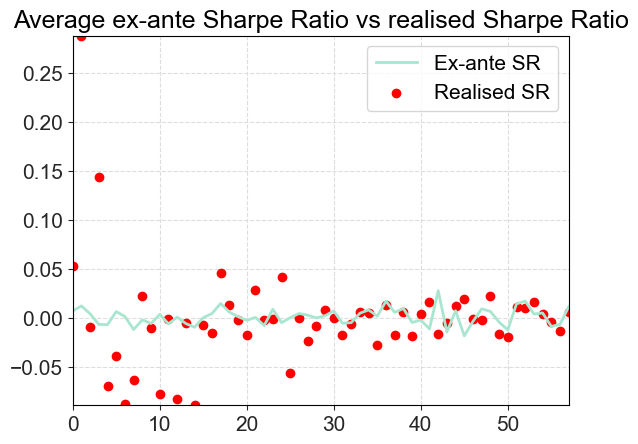

In [206]:
plt.plot(m_exp_SR)
plt.scatter(m_real_SR.index, m_real_ret.mean(axis=0).values, color="red")
plt.title("Average ex-ante Sharpe Ratio vs realised Sharpe Ratio")
plt.legend(["Ex-ante SR", "Realised SR"])

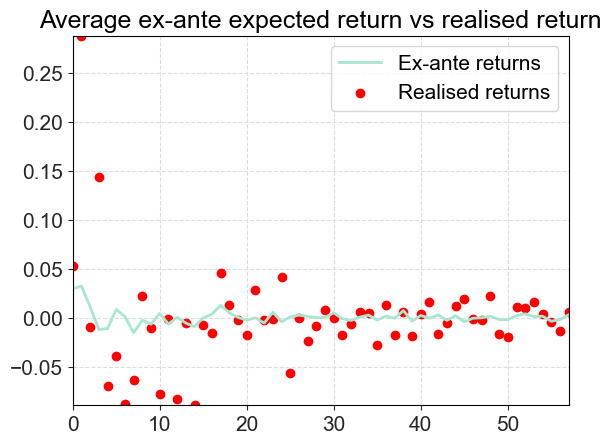

In [207]:
plt.plot(m_exp_ret.mean(axis=0))
#plt.plot(m_exp_vol/10)
plt.scatter(m_real_ret.columns, m_real_ret.mean(axis=0).values, color="red")
plt.title("Average ex-ante expected return vs realised return")
plt.legend(["Ex-ante returns", "Realised returns"])

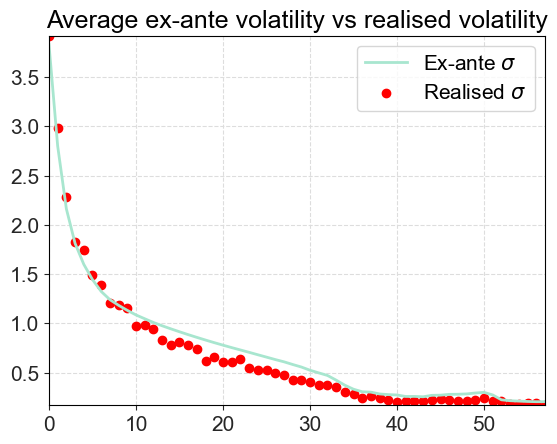

In [208]:
plt.plot(m_exp_vol)
plt.scatter(m_real_vol.index,m_real_vol.values, color="red")
plt.title("Average ex-ante volatility vs realised volatility")
plt.legend(["Ex-ante $\\sigma$", "Realised $\\sigma$"])

# PCA FINAL - constructed for monthly PF updated

In [366]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [499]:
#Daily return index
index_daily_returns = (1+returns_daily).cumprod(axis=0)

#Monthly return index:
index_monthly = index_daily_returns.assign(m=index_daily_returns.index.to_period("m")).drop_duplicates("m").drop("m",axis=1)

#Monthly returns:
returns_monthly = index_monthly.pct_change(1)

#Annual returns:
returns_annual = index_monthly.pct_change(12)

#volatily
vol_ex_ante  = returns_daily.rolling(2610).std()

#Keeps only sigma_t for the dates prior to the rebalancing dates
vol_ex_ante = vol_ex_ante.T[vol_ex_ante.T.columns[vol_ex_ante.T.columns.isin(returns_monthly.index)]].T


#Expected daily returns (s_t)
s_t = 0.1 * np.sqrt(22)*vol_ex_ante * np.sign(returns_annual)

#Monthly realised returns --> r_t+1:
r_t1 = returns_monthly.shift(1)

,COPPER,ALUMINIUM,NICKEL,ZINC,BRENT CRUDE OIL,GAS OIL,COTTON,COFFEE,COCOA,SUGAR,...,EUR,GBP,DKK,CHF,SEK,JPY,CAD,NOK,TRY,AUD
nan,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-01,NaN,NaN,NaN,NaN,0.043004,-0.174279,-0.017869,-0.002234,0.035522,0.137481,...,-0.016597,-0.049803,-0.019764,-0.052004,-0.016814,-0.004829,0.020692,-0.022132,0.000000,0.005512
1990-04-02,NaN,NaN,NaN,NaN,-0.018330,-0.002967,0.022564,0.227423,0.146178,-0.021650,...,0.011952,0.016446,0.008925,0.009999,0.000940,0.034557,0.001253,0.012436,0.000000,0.012243
1990-05-01,NaN,NaN,NaN,NaN,-0.044491,0.005871,0.060467,-0.074889,0.102284,0.053905,...,-0.010272,0.001445,-0.017958,-0.007790,-0.012349,0.059678,-0.027343,-0.005825,0.000000,-0.006851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,-0.024390,-0.017802,-0.000553,0.084361,-0.083128,-0.138870,-0.034635,-0.065658,0.011236,-0.021029,...,0.027152,-0.003808,0.027668,-0.002253,-0.008370,-0.015992,0.001272,-0.007379,0.039817,-0.007787
2022-10-03,-0.014128,-0.052606,-0.089320,-0.061879,-0.063547,0.074311,0.088598,0.107291,0.008169,0.026003,...,0.023409,0.057982,0.022567,0.027676,0.053967,0.055567,0.019288,0.025544,-0.008460,0.016177
2022-11-01,0.021632,0.017940,0.071537,-0.028451,-0.003051,-0.002086,-0.145432,-0.041521,-0.023179,-0.001529,...,-0.001232,0.003216,-0.001175,0.001014,0.007251,0.031114,0.028711,0.042120,0.002974,0.048331


In [402]:
#First, we develop the dataframes containing 10Y (~2610 daily) returns. These are calculated based on the 2610 daily returns prior to the rebalancing date
N = 2611
returns_daily_10Y = [[[]]]

for i,date in enumerate(index_monthly.index[120:]): # first update is therefore 2000-01-03, as 10Y data is needed prior to first pf update
    returns_daily_10Y.append(returns_daily[:date][-N:])
    returns_daily_10Y[i+1]=returns_daily_10Y[i+1].dropna(axis=1)

In [557]:
test = list()
for i in range(len(returns_daily_10Y)-2):
    #scaling to mean 0 and sd=1
    returns_10Y_scaled = scaler.fit_transform(returns_daily_10Y[i+1][:-1])*np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    # USING SKLEARN
    pca = PCA(n_components=len(returns_daily_10Y[i+1][:-1].columns)) 
    pca.fit_transform(returns_10Y_scaled)

    # get the Principal components
    pcs =pca.components_



    #test.append(-pcs[0:30] @ np.array(r_t1[121+i:122+i][r_t1.columns[r_t1.columns.isin(returns_daily_10Y[i+1].dropna(axis=1).columns)]])[0])
    test.append(-pcs[0:30] @ np.array(s_t[121+i:122+i][s_t.columns[s_t.columns.isin(returns_daily_10Y[i+1].dropna(axis=1).columns)]])[0])

In [ ]:
#PCA new - 22/3/2023
pc_j = [[[]]]
m_exp_ret = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))
m_real_ret = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))

m_exp_vol = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))

m_exp_SR = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))

for i in range(len(returns_daily_10Y)-2): # number of arrays
    #scaling to mean 0 and sd=1
    returns_10Y_scaled = scaler.fit_transform(returns_daily_10Y[i+1][:-1])*np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    # USING SKLEARN
    pca = PCA(n_components=len(returns_daily_10Y[i+1][:-1].columns)) 
    pca.fit_transform(returns_10Y_scaled)

    # get the Principal components
    pcs =pca.components_

    # j'th component
    pc_j.append(pcs)

    #The below code will calculate ex ante vol + returns and realised vol + returns
    sigma_i = np.sqrt(22) * np.diag(returns_daily_10Y[i+1].std(axis=0))

    s_temp = s_t[121+i:122+i][s_t.columns[s_t.columns.isin(returns_daily_10Y[i+1].dropna(axis=1).columns)]]

    #r_temp = returns_daily_10Y[i+1][-1:]
    r_temp = r_t1[121+i:122+i][r_t1.columns[r_t1.columns.isin(returns_daily_10Y[i+1].dropna(axis=1).columns)]]

    #returns:
    m_exp_ret.iloc[i:i+1,0:len(s_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(s_temp)[0] *np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    m_real_ret.iloc[i:i+1,0:len(r_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(r_temp)[0] *np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    #ex-ante vol is equal to PC eigenvalue:
    m_exp_vol.iloc[i:i+1,0:len(s_temp.columns)] = np.sqrt(pca.explained_variance_)

    #ex-ante SR:
    m_exp_SR.iloc[i:i+1,0:len(s_temp.columns)] = m_exp_ret.iloc[i:i+1,0:len(s_temp.columns)]/pca.explained_variance_

m_exp_vol = m_exp_vol.mean(axis=0)
m_real_vol = m_real_ret.std(axis=0)

m_exp_SR = m_exp_SR.mean(axis=0)
m_real_SR = m_real_ret.mean(axis=0)/m_real_vol

In [582]:
#PCA
pc_j = [[[]]]
m_exp_ret = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))
m_real_ret = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))

m_exp_vol = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))

m_exp_SR = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))

for i in range(len(returns_daily_10Y)-2): # number of arrays
    #scaling to mean 0 and sd=1
    returns_10Y_scaled = scaler.fit_transform(returns_daily_10Y[i+1][:-1])*np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    # USING SKLEARN
    pca = PCA(n_components=len(returns_daily_10Y[i+1][:-1].columns)) 
    pca.fit_transform(returns_10Y_scaled)

    # get the Principal components
    pcs =pca.components_

    # j'th component
    pc_j.append(pcs)

    #The below code will calculate ex ante vol + returns and realised vol + returns
    sigma_i = np.sqrt(22) * np.diag(returns_daily_10Y[i+1].std(axis=0))

    s_temp = s_t[121+i:122+i][s_t.columns[s_t.columns.isin(returns_daily_10Y[i+1].dropna(axis=1).columns)]]

    #r_temp = returns_daily_10Y[i+1][-1:]
    r_temp = r_t1[121+i:122+i][r_t1.columns[r_t1.columns.isin(returns_daily_10Y[i+1].dropna(axis=1).columns)]]

    #returns:
    m_exp_ret.iloc[i:i+1,0:len(s_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(s_temp)[0] *np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    m_real_ret.iloc[i:i+1,0:len(r_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(r_temp)[0] *np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    #ex-ante vol is equal to PC eigenvalue:
    m_exp_vol.iloc[i:i+1,0:len(s_temp.columns)] = np.sqrt(pca.explained_variance_)

    #ex-ante SR:
    m_exp_SR.iloc[i:i+1,0:len(s_temp.columns)] = m_exp_ret.iloc[i:i+1,0:len(s_temp.columns)]/pca.explained_variance_

m_exp_vol = m_exp_vol.mean(axis=0)
m_real_vol = m_real_ret.std(axis=0)

m_exp_SR = m_exp_SR.mean(axis=0)
m_real_SR = m_real_ret.mean(axis=0)/m_real_vol

In [583]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

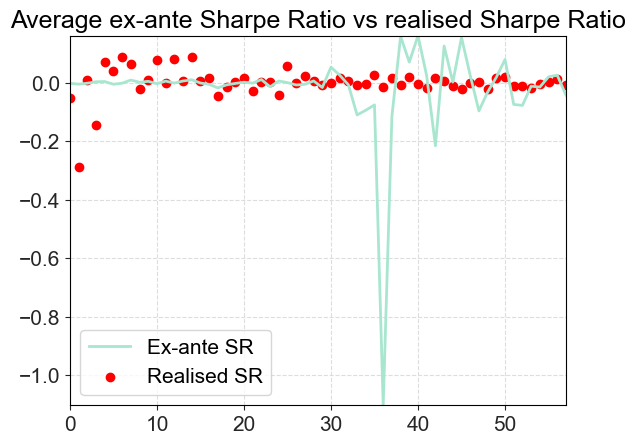

In [152]:
plt.plot(m_exp_SR)
plt.scatter(m_real_SR.index, m_real_ret.mean(axis=0).values, color="red")
plt.title("Average ex-ante Sharpe Ratio vs realised Sharpe Ratio")
plt.legend(["Ex-ante SR", "Realised SR"])

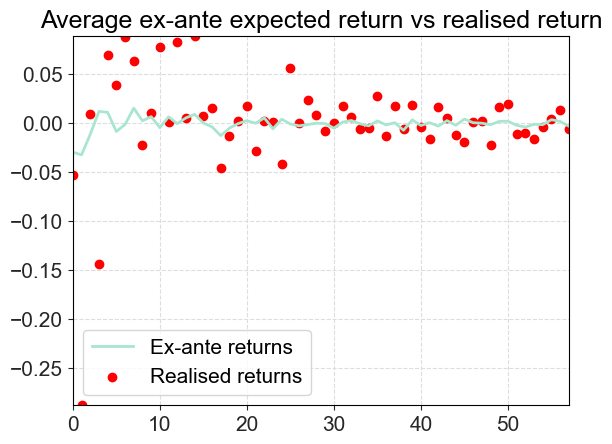

In [153]:
plt.plot(m_exp_ret.mean(axis=0))
#plt.plot(m_exp_vol/10)
plt.scatter(m_real_ret.columns, m_real_ret.mean(axis=0).values, color="red")
plt.title("Average ex-ante expected return vs realised return")
plt.legend(["Ex-ante returns", "Realised returns"])

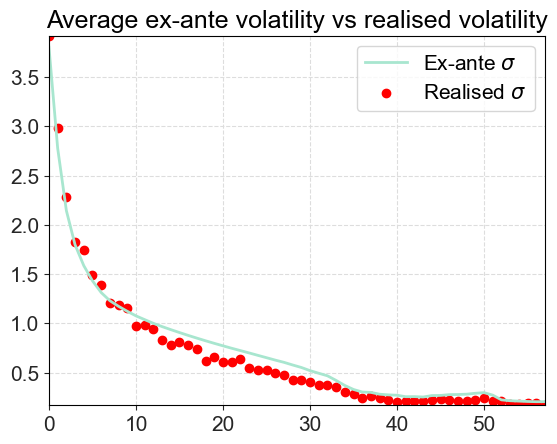

In [154]:
plt.plot(m_exp_vol)
plt.scatter(m_real_vol.index,m_real_vol.values, color="red")
plt.title("Average ex-ante volatility vs realised volatility")
plt.legend(["Ex-ante $\\sigma$", "Realised $\\sigma$"])

## Monthly

In [362]:
#Daily return index
index_daily_returns = (1+returns_daily).cumprod(axis=0)

#Monthly return index:
index_monthly = index_daily_returns.assign(m=index_daily_returns.index.to_period("m")).drop_duplicates("m").drop("m",axis=1)

#Monthly returns:
returns_monthly = index_monthly.pct_change(1)
returns_monthly = returns_monthly[1:]

#Annual returns:
returns_annual = index_monthly.pct_change(12)

#volatily
vol_ex_ante  = returns_daily.rolling(2610).std()

#Keeps only sigma_t for the dates prior to the rebalancing dates
vol_ex_ante = np.sqrt(22)*vol_ex_ante.T[vol_ex_ante.T.columns[vol_ex_ante.T.columns.isin(returns_monthly.index)]].T


#Expected daily returns (s_t)
s_t = 0.1 * vol_ex_ante * np.sign(returns_annual)

#Monthly realised returns --> r_t+1:
r_t1 = returns_monthly.shift(1)

In [363]:
#First, we develop the dataframes containing 10Y (~2610 daily) returns. These are calculated based on the 2610 daily returns prior to the rebalancing date
N = 121
returns_daily_10Y = [[[]]]

for i,date in enumerate(index_monthly.index[120:]): # first update is therefore 2000-01-03, as 10Y data is needed prior to first pf update
    returns_daily_10Y.append(returns_monthly[:date][-N:])
    returns_daily_10Y[i+1]=returns_daily_10Y[i+1].dropna(axis=1)

In [364]:
#PCA
pc_j = [[[]]]
m_exp_ret = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))
m_real_ret = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))

m_exp_vol = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))

m_exp_SR = pd.DataFrame(0,index=returns_monthly[120:].index, columns=range(58))

for i in range(len(returns_daily_10Y)-2): # number of arrays
    #scaling to mean 0 and sd=1
    returns_10Y_scaled = scaler.fit_transform(returns_daily_10Y[i+1][:-1])*np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    # USING SKLEARN
    #pca = PCA(n_components=len(returns_daily_10Y[i+1][:-1].columns)) 
    #pca.fit_transform(returns_10Y_scaled)

    # get the Principal components
    #pcs =pca.components_

    # j'th component
   # pc_j.append(pcs)

    #The below code will calculate ex ante vol + returns and realised vol + returns
    sigma_i = np.diag(returns_daily_10Y[i+1].std(axis=0))

    ###
        #scaling to mean 0 and sd=1
    returns_10Y_scaled = np.linalg.inv(sigma_i) @np.array(returns_daily_10Y[i+1][:-1].T)*np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))
    returns_10Y_scaled = returns_10Y_scaled.T

    # USING SKLEARN
    pca = PCA(n_components=len(returns_daily_10Y[i+1][:-1].columns)) 
    pca.fit_transform(returns_10Y_scaled)

    # get the Principal components
    pcs =pca.components_

    # j'th component
    pc_j.append(pcs)
    ###

    s_temp = s_t[121+i:122+i][s_t.columns[s_t.columns.isin(returns_daily_10Y[i+1].dropna(axis=1).columns)]]

    r_temp = r_t1[120+i:121+i][s_t.columns[s_t.columns.isin(returns_daily_10Y[i+1].dropna(axis=1).columns)]]

    #returns:
    m_exp_ret.iloc[i:i+1,0:len(s_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(s_temp)[0] *np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    m_real_ret.iloc[i:i+1,0:len(r_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(r_temp)[0] *np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    #ex-ante vol is equal to PC eigenvalue:
    m_exp_vol.iloc[i:i+1,0:len(s_temp.columns)] = pca.explained_variance_

    #ex-ante SR:
    m_exp_SR.iloc[i:i+1,0:len(s_temp.columns)] = m_exp_ret.iloc[i:i+1,0:len(s_temp.columns)]/pca.explained_variance_

m_exp_vol = m_exp_vol.mean(axis=0)
m_real_vol = m_real_ret.std(axis=0)

m_exp_SR = m_exp_SR.mean(axis=0)
m_real_SR = m_real_ret.mean(axis=0)/m_real_vol

In [365]:
pd.DataFrame(returns_daily_10Y[6])

,BRENT CRUDE OIL,GAS OIL,COTTON,COFFEE,COCOA,SUGAR,LIVE CATTLE,LEAN HOGS,CORN,SOYBEANS,...,EUR,GBP,DKK,CHF,SEK,JPY,CAD,NOK,TRY,AUD
nan,,,,,,,,,,,,,,,,,,,,,
1990-06-01,-0.082987,-0.083710,0.082243,0.006065,0.010195,-0.143492,0.010987,0.018005,-0.052768,-0.090526,...,0.008676,-0.027915,0.005682,-0.010424,-0.000174,-0.041490,0.003264,-0.004415,0.000000,-0.026324
1990-07-02,-0.039936,0.015789,0.024167,-0.070309,-0.011513,-0.015567,0.008049,-0.043425,0.069591,0.092754,...,-0.026596,-0.059204,-0.027546,-0.032842,-0.024142,-0.001974,-0.016053,-0.027469,0.000000,-0.040957
1990-08-01,0.338476,0.401873,-0.054656,0.060482,-0.084975,-0.217620,0.051041,-0.004538,-0.132622,-0.114286,...,-0.032164,-0.048453,-0.034271,-0.027996,-0.029932,-0.010269,-0.013273,-0.031640,0.000000,0.010679
1990-09-03,0.379223,0.287300,0.016467,0.056261,0.061294,0.024133,-0.039301,-0.064090,-0.050659,0.043300,...,-0.008663,-0.018345,-0.005039,-0.029507,-0.009124,-0.040473,0.003402,-0.009805,0.000000,-0.043077
1990-10-01,0.233892,0.204981,-0.006727,-0.073144,-0.054054,-0.028846,0.032709,0.131415,-0.038420,-0.028835,...,-0.016365,-0.012889,-0.022390,-0.019556,-0.016912,-0.046142,-0.010826,-0.016136,0.000000,-0.019984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-02-01,0.094555,0.071514,0.124384,-0.034409,-0.083732,-0.046794,0.013715,0.028327,0.087438,0.070333,...,0.056640,0.016841,0.056160,0.063133,0.044011,0.052839,-0.010577,0.036622,0.022340,0.025524
2000-03-01,0.168800,0.098662,0.027218,-0.067408,0.021285,-0.123541,0.007642,0.107594,-0.021478,-0.013267,...,0.013346,0.020347,0.013868,0.011938,0.006456,0.000902,0.014963,0.014139,-0.004630,0.054102
2000-04-03,-0.150476,-0.130007,-0.057185,-0.054322,-0.014616,0.171371,-0.000820,0.081233,0.035714,0.054848,...,0.008417,-0.010407,0.008016,-0.010373,-0.014923,-0.018715,-0.002373,0.015110,0.000951,0.003004


In [210]:
np.array(returns_daily_10Y[1][:-1]).values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

# PCA FINAL - constructed for daily PF update but scaled to monthly

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [384]:
#Daily return index
index_daily_returns = (1+returns_daily).cumprod(axis=0)

#Monthly return index:
index_monthly = index_daily_returns.assign(m=index_daily_returns.index.to_period("m")).drop_duplicates("m").drop("m",axis=1)

#Monthly returns:
returns_monthly = index_daily_returns.pct_change(1)

#Annual returns:
returns_annual = index_daily_returns.pct_change(261)

#volatily
vol_ex_ante  = returns_daily.rolling(2610).std()

#Keeps only sigma_t for the dates prior to the rebalancing dates
vol_ex_ante = vol_ex_ante.T[vol_ex_ante.T.columns[vol_ex_ante.T.columns.isin(returns_monthly.index)]].T


#Expected daily returns (s_t)
#s_t = 0.0213 * vol_ex_ante * np.sign(returns_annual)
s_t = 0.1 * np.sqrt(22) * vol_ex_ante * np.sign(returns_annual)
#Monthly realised returns --> r_t+1:
r_t1 = returns_monthly.shift(1)

In [376]:
#First, we develop the dataframes containing 10Y (~2610 daily) returns. These are calculated based on the 2610 daily returns prior to the rebalancing date
N = 2611
returns_daily_10Y = [[[]]]

for i,date in enumerate(returns_daily.index[2611:]): # first update is therefore 2000-01-03, as 10Y data is needed prior to first pf update
    returns_daily_10Y.append(returns_daily[:date][-N:])
    returns_daily_10Y[i+1]=returns_daily_10Y[i+1].dropna(axis=1)

In [377]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [385]:
#PCA
pc_j = [[[]]]
m_exp_ret = pd.DataFrame(0,index=returns_daily.index[2611:], columns=range(58))
m_real_ret = pd.DataFrame(0,index=returns_daily.index[2611:], columns=range(58))

m_exp_vol = pd.DataFrame(0,index=returns_daily.index[2611:], columns=range(58))

m_exp_SR = pd.DataFrame(0,index=returns_daily.index[2611:], columns=range(58))

for i in range(len(returns_daily_10Y)-2): # number of arrays
    #scaling to mean 0 and sd=1
    returns_10Y_scaled = scaler.fit_transform(returns_daily_10Y[i+1][:-1])*np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    # USING SKLEARN
    pca = PCA(n_components=len(returns_daily_10Y[i+1][:-1].columns)) 
    pca.fit_transform(returns_10Y_scaled)

    # get the Principal components
    pcs =pca.components_

    # j'th component
    pc_j.append(pcs)

    #The below code will calculate ex ante vol + returns and realised vol + returns
    sigma_i = np.diag((22*np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))*returns_daily_10Y[i+1]).std(axis=0))

    s_temp = s_t[2610+i:2611+i][s_t.columns[s_t.columns.isin(returns_daily_10Y[i+1].dropna(axis=1).columns)]]

    r_temp = returns_daily_10Y[i+1][-1:]

    #returns:
    m_exp_ret.iloc[i:i+1,0:len(s_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(s_temp)[0]*22*np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    m_real_ret.iloc[i:i+1,0:len(r_temp.columns)] = -pcs @ np.linalg.inv(sigma_i) @ np.array(r_temp)[0] *22*np.sqrt(58/len(returns_daily_10Y[i+1][:-1].columns))

    #ex-ante vol is equal to PC eigenvalue:
    m_exp_vol.iloc[i:i+1,0:len(s_temp.columns)] = pca.explained_variance_

    #ex-ante SR:
    m_exp_SR.iloc[i:i+1,0:len(s_temp.columns)] = m_exp_ret.iloc[i:i+1,0:len(s_temp.columns)]/pca.explained_variance_

m_exp_vol = m_exp_vol.mean(axis=0)
m_real_vol = m_real_ret.std(axis=0)

m_exp_SR = m_exp_SR.mean(axis=0)
m_real_SR = m_real_ret.mean(axis=0)/m_real_vol

In [395]:
m_real_ret.mean(axis=0).values*100

array([ 5.33105812e+00, -1.90715598e+00,  5.26312665e+00,  2.26729503e+00,
        7.27687856e+00, -2.64267598e+00, -2.14648113e+00, -6.33810533e-02,
       -7.33438161e-02, -5.67368050e-01,  2.24950415e+00, -1.19087399e+00,
       -2.58491251e-01,  6.98734946e-01, -1.02536666e-01,  1.58325108e+00,
        2.82125180e+00,  1.16676727e+00, -2.47089296e-01,  6.28186080e-01,
        1.71662800e+00,  5.00798652e-01,  1.76140204e-01,  6.39640731e-01,
        6.66123703e-01, -1.18881198e+00,  1.12182865e+00, -1.14465085e+00,
       -1.86291192e+00, -5.20934210e-02,  6.77663551e-01, -7.91990071e-01,
        9.30449566e-01, -4.87513106e-01,  1.07986578e-01,  2.65554470e-02,
        6.42386679e-01,  1.58735612e-01,  2.05550995e-01, -3.01984495e-02,
       -8.30919517e-01,  4.54308220e-01, -1.70979289e-01, -2.69865074e-01,
        2.19471200e-01, -6.85776673e-01, -3.20347819e-01, -4.11167320e-01,
        1.27103589e-01, -1.48395701e-01, -1.33096073e-01,  4.36800591e-01,
        1.71581601e-01,  

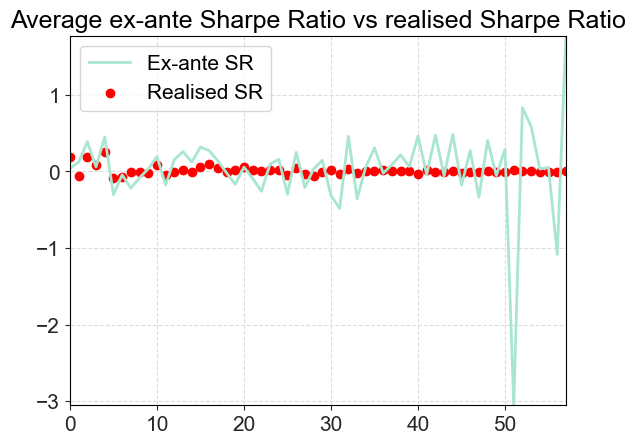

In [392]:
plt.plot(m_exp_SR*np.sqrt(12))
plt.scatter(m_real_SR.index, m_real_ret.mean(axis=0).values*np.sqrt(12), color="red")
plt.title("Average ex-ante Sharpe Ratio vs realised Sharpe Ratio")
plt.legend(["Ex-ante SR", "Realised SR"])

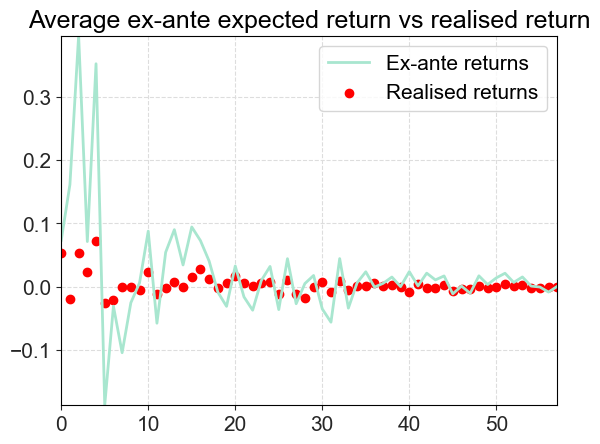

In [387]:
plt.plot(m_exp_ret.mean(axis=0))
plt.scatter(m_real_ret.columns, m_real_ret.mean(axis=0).values, color="red")
plt.title("Average ex-ante expected return vs realised return")
plt.legend(["Ex-ante returns", "Realised returns"])

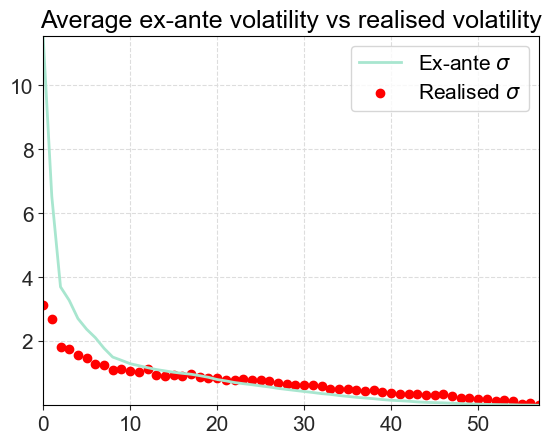

In [388]:
plt.plot(m_exp_vol)
plt.scatter(m_real_vol.index,m_real_vol.values, color="red")
plt.title("Average ex-ante volatility vs realised volatility")
plt.legend(["Ex-ante $\\sigma$", "Realised $\\sigma$"])

In [389]:
m_real_vol.values.sum()

43.98199343603159

In [390]:
m_exp_vol.values.sum()

58.01259409620945

In [399]:
m_exp_ret[:-1].std().sum()

20.194144185673785